<h1>Importing...</h1>

In [1]:
import math 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer

# for visualization(candlestick)
import datetime as dt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

C:\Users\Legen\Desktop\Major Project\env\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


<h1>Importing Data...</h1>

In [64]:
ahpc_read =pd.read_csv('ahpc.csv')
ahpc=pd.DataFrame(ahpc_read)
print(ahpc)

      S.N.       Date   Open   High    Low    Ltp  % Change     Qty  \
0        1  4/21/2022  379.0  397.0  365.0  382.0      2.72   74534   
1        2  4/20/2022  388.1  395.0  371.0  371.9     -4.64  108762   
2        3  4/19/2022  394.9  403.0  379.0  390.0      0.65   91503   
3        4  4/18/2022  408.9  408.9  387.0  387.5     -3.41   83672   
4        5  4/17/2022  415.0  421.0  401.2  401.2     -2.86  118936   
...    ...        ...    ...    ...    ...    ...       ...     ...   
2645  2646  5/25/2010  486.0  530.0  495.0  510.0      0.00    1840   
2646  2647  5/24/2010  492.0  501.0  486.0  486.0      0.00     340   
2647  2648  5/23/2010  490.0  499.0  490.0  492.0      0.00    1160   
2648  2649  5/20/2010  475.0  492.0  480.0  490.0      0.00     590   
2649  2650  5/19/2010  479.0  475.0  469.0  475.0      0.00     380   

        Turnover  
0     27842069.4  
1     41534206.9  
2     35573369.2  
3     32988464.0  
4     48625304.7  
...          ...  
2645         0

<h1>arranging data in ascending order by date</h1>

In [65]:
ahpc=ahpc.reindex(index=ahpc.index[::-1])
ahpc.reset_index(inplace=True)
ltp=ahpc['Ltp']
miny=ltp[ltp.gt(0)].min(axis=0)
maxy=ltp[ltp.gt(0)].max(axis=0)
print(ahpc,miny,maxy)

      index  S.N.       Date   Open   High    Low    Ltp  % Change     Qty  \
0      2649  2650  5/19/2010  479.0  475.0  469.0  475.0      0.00     380   
1      2648  2649  5/20/2010  475.0  492.0  480.0  490.0      0.00     590   
2      2647  2648  5/23/2010  490.0  499.0  490.0  492.0      0.00    1160   
3      2646  2647  5/24/2010  492.0  501.0  486.0  486.0      0.00     340   
4      2645  2646  5/25/2010  486.0  530.0  495.0  510.0      0.00    1840   
...     ...   ...        ...    ...    ...    ...    ...       ...     ...   
2645      4     5  4/17/2022  415.0  421.0  401.2  401.2     -2.86  118936   
2646      3     4  4/18/2022  408.9  408.9  387.0  387.5     -3.41   83672   
2647      2     3  4/19/2022  394.9  403.0  379.0  390.0      0.65   91503   
2648      1     2  4/20/2022  388.1  395.0  371.0  371.9     -4.64  108762   
2649      0     1  4/21/2022  379.0  397.0  365.0  382.0      2.72   74534   

        Turnover  
0            0.0  
1            0.0  
2     

<h1>Filtering features</h1>

In [66]:
x=ahpc[["Qty","High","Low","Turnover","Open"]]
# x=nabil[["Max Price "]]
y=ahpc[["Ltp"]]

# trying data normaliztion
# normal=Normalizer()
# x=normal.fit_transform(x)
# y=normal.fit_transform(np.array(y).reshape(-1,1))
# x=(x-minx)/(maxx-minx)
# y=(y-miny)/(maxy-miny)
# y=np.array(y).reshape(-1,1)

#trying data scaling
# using
# norm=np.hstack((x,y))
# norm=norm[~np.any(norm==0,axis=1)]
# x=norm[:,0:4]
# y=norm[:,4:5]
# /using
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)
# using
# norm=np.hstack((x,y))
# norm=norm[~np.any(norm==0,axis=1)]
# x=norm[:,0:4]
# y=norm[:,4:5]
# /using

# y[training-9:-400]

In [67]:
#test 
# x=nabil[["Total Traded Shares","Max Price ","Min. Price","Total Traded Shares"]]
# # x=nabil[["Max Price "]]
# y=nabil["Close Price"]

# x_dataset=x.values
# print(training)


length=len(x)
training=int(0.8*length)
test=int(length-training)
# print(y[y.gt(0)].min(axis=0),y[y.gt(0)].max(axis=0))
print(length,training,test)

2650 2120 530


<h1>Splitting data to training and test data</h1>

In [68]:
x_training_data=x[0:training-1]
y_training_data=y[1:training]
x_test_data=x[training:(training+test)]
y_test_data=y[training+1:(training+test)]
# y_test_data.index = pd.RangeIndex(start=0, stop=448, step=1)
# x_test_data.index = pd.RangeIndex(start=0, stop=448, step=1)
# test_date=nabil["Date"][training:(training+test)-1]
# test_date.index = pd.RangeIndex(start=0, stop=448, step=1)
print(x_test_data.shape)
print(y_test_data[0:2])

(530, 5)
[[0.00729927]
 [0.00729927]]


In [7]:
print(x_training_data.shape,x_test_data.shape)

(2119, 5) (530, 5)


In [8]:
model=Sequential()
model.add(LSTM(250, input_shape=(5,1), return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))
# model.add(LSTM(1))

In [9]:
model.compile(loss='mean_absolute_error',optimizer='ADAM',metrics=['mean_absolute_error'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 250)            252000    
                                                                 
 lstm_1 (LSTM)               (None, 10)                10440     
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 262,561
Trainable params: 262,561
Non-trainable params: 0
_________________________________________________________________


In [11]:
history=model.fit(x_training_data,y_training_data,epochs=20,batch_size=16)
# ,validation_data=(x_test_data,y_test_data)

Epoch 1/20
133/133 [==============================] - 5s 10ms/step - loss: 0.0457 - mean_absolute_error: 0.0457
Epoch 2/20
133/133 [==============================] - 1s 10ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 3/20
133/133 [==============================] - 1s 10ms/step - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 4/20
133/133 [==============================] - 1s 10ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 5/20
133/133 [==============================] - 1s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0119
Epoch 6/20
133/133 [==============================] - 1s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 7/20
133/133 [==============================] - 1s 10ms/step - loss: 0.0116 - mean_absolute_error: 0.0116
Epoch 8/20
133/133 [==============================] - 1s 10ms/step - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 9/20
133/133 [==============================] - 1s 10ms/step - loss: 0.0111 - mean_absolute_error:

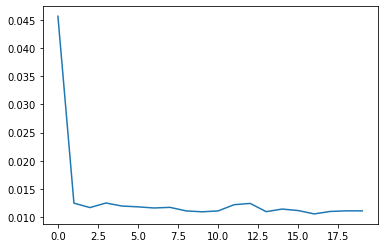

[0.00673777]


In [12]:
result=model.predict(x_test_data)
plt.plot(history.history['loss'])
plt.show()
print(result[0])

529 (530, 1) (529, 1)


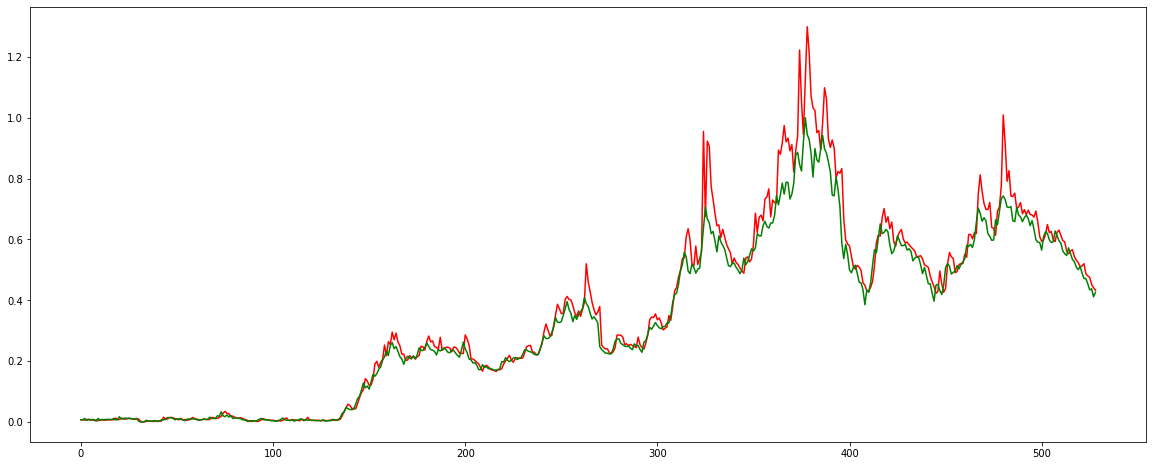

In [13]:
result_length=len(result)-1
result_plot=result[0:result_length]
print(result_length,result.shape,result_plot.shape)
plt.figure(figsize=(20, 8))
# plt.scatter(range(449),result,c='r',s=5)
# plt.scatter(range(449),y_test_data,c='g',s=5)
plt.plot(range(result_length),result_plot,c='r')
plt.plot(range(result_length),y_test_data,c='g')
plt.show()

In [14]:
error_length=len(result_plot)
test_true_data=y_test_data*(maxy-miny)+miny
result_true_data=result_plot*(maxy-miny)+miny
last_error=abs(test_true_data-result_true_data)
print(last_error.sum(axis=0)/error_length)

[21.40445755]


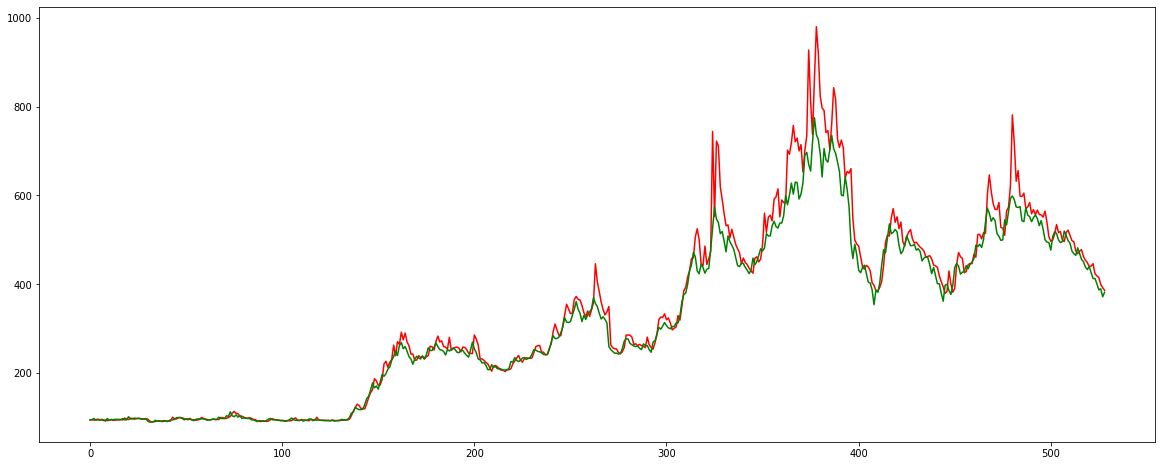

In [15]:
plt.figure(figsize=(20, 8))
# plt.scatter(range(plot_length),x_data,c='r',s=5)
# plt.scatter(range(plot_length),y_data,c='g',s=5)
plt.plot(range(result_length),result_true_data,c='r')
plt.plot(range(result_length),test_true_data,c='g')
plt.show()

In [16]:
0.0118*(maxy-miny)+miny

98.083

In [17]:
print(maxy,miny)

775.0 90.0


<h1>Calculating RMSE</h1>

In [18]:
last_error=(test_true_data-result_true_data)**2
print(math.sqrt(last_error.sum(axis=0)/error_length))
# RMSE=math.sqrt(last_error)
# print(last_error)

40.686684128990265


In [19]:
print(result[error_length]*(maxy-miny)+miny)

[380.4445]


In [20]:
print(test_true_data[error_length-1])
print(result_true_data[error_length-1])

[382.]
[386.31042]


In [21]:
 1-np.sqrt(np.mean(np.square((test_true_data-result_true_data)/test_true_data)))

0.9201915181566648

In [121]:
data=ahpc[["Open","High","Low","Ltp"]]
data=data[training+1:(training+test)]
data.reset_index(inplace=True)
# print(data)
temp_date=pd.to_datetime(ahpc["Date"])
temp_date=temp_date.map(mdates.date2num)
temp_date=temp_date[training+1:(training+test)]
temp_date = pd.DataFrame(temp_date)
temp_date.reset_index(inplace=True)
data["Date"]=temp_date["Date"]
data.rename(columns = {'Ltp':'Close'}, inplace = True)
# del data["index"]
print(data)
print(data.dtypes)
# data['Date']=temp_date[training+1:(training+test)]

     index   Open   High    Low  Close     Date
0     2121   96.0   98.0   94.0   95.0  18214.0
1     2122   95.0   95.0   94.0   95.0  18217.0
2     2123   94.0   98.0   94.0   98.0  18218.0
3     2124   99.0  100.0   94.0   94.0  18219.0
4     2125   95.0   97.0   95.0   95.0  18220.0
..     ...    ...    ...    ...    ...      ...
524   2645  415.0  421.0  401.2  401.2  19099.0
525   2646  408.9  408.9  387.0  387.5  19100.0
526   2647  394.9  403.0  379.0  390.0  19101.0
527   2648  388.1  395.0  371.0  371.9  19102.0
528   2649  379.0  397.0  365.0  382.0  19103.0

[529 rows x 6 columns]
index      int64
Open     float64
High     float64
Low      float64
Close    float64
Date     float64
dtype: object


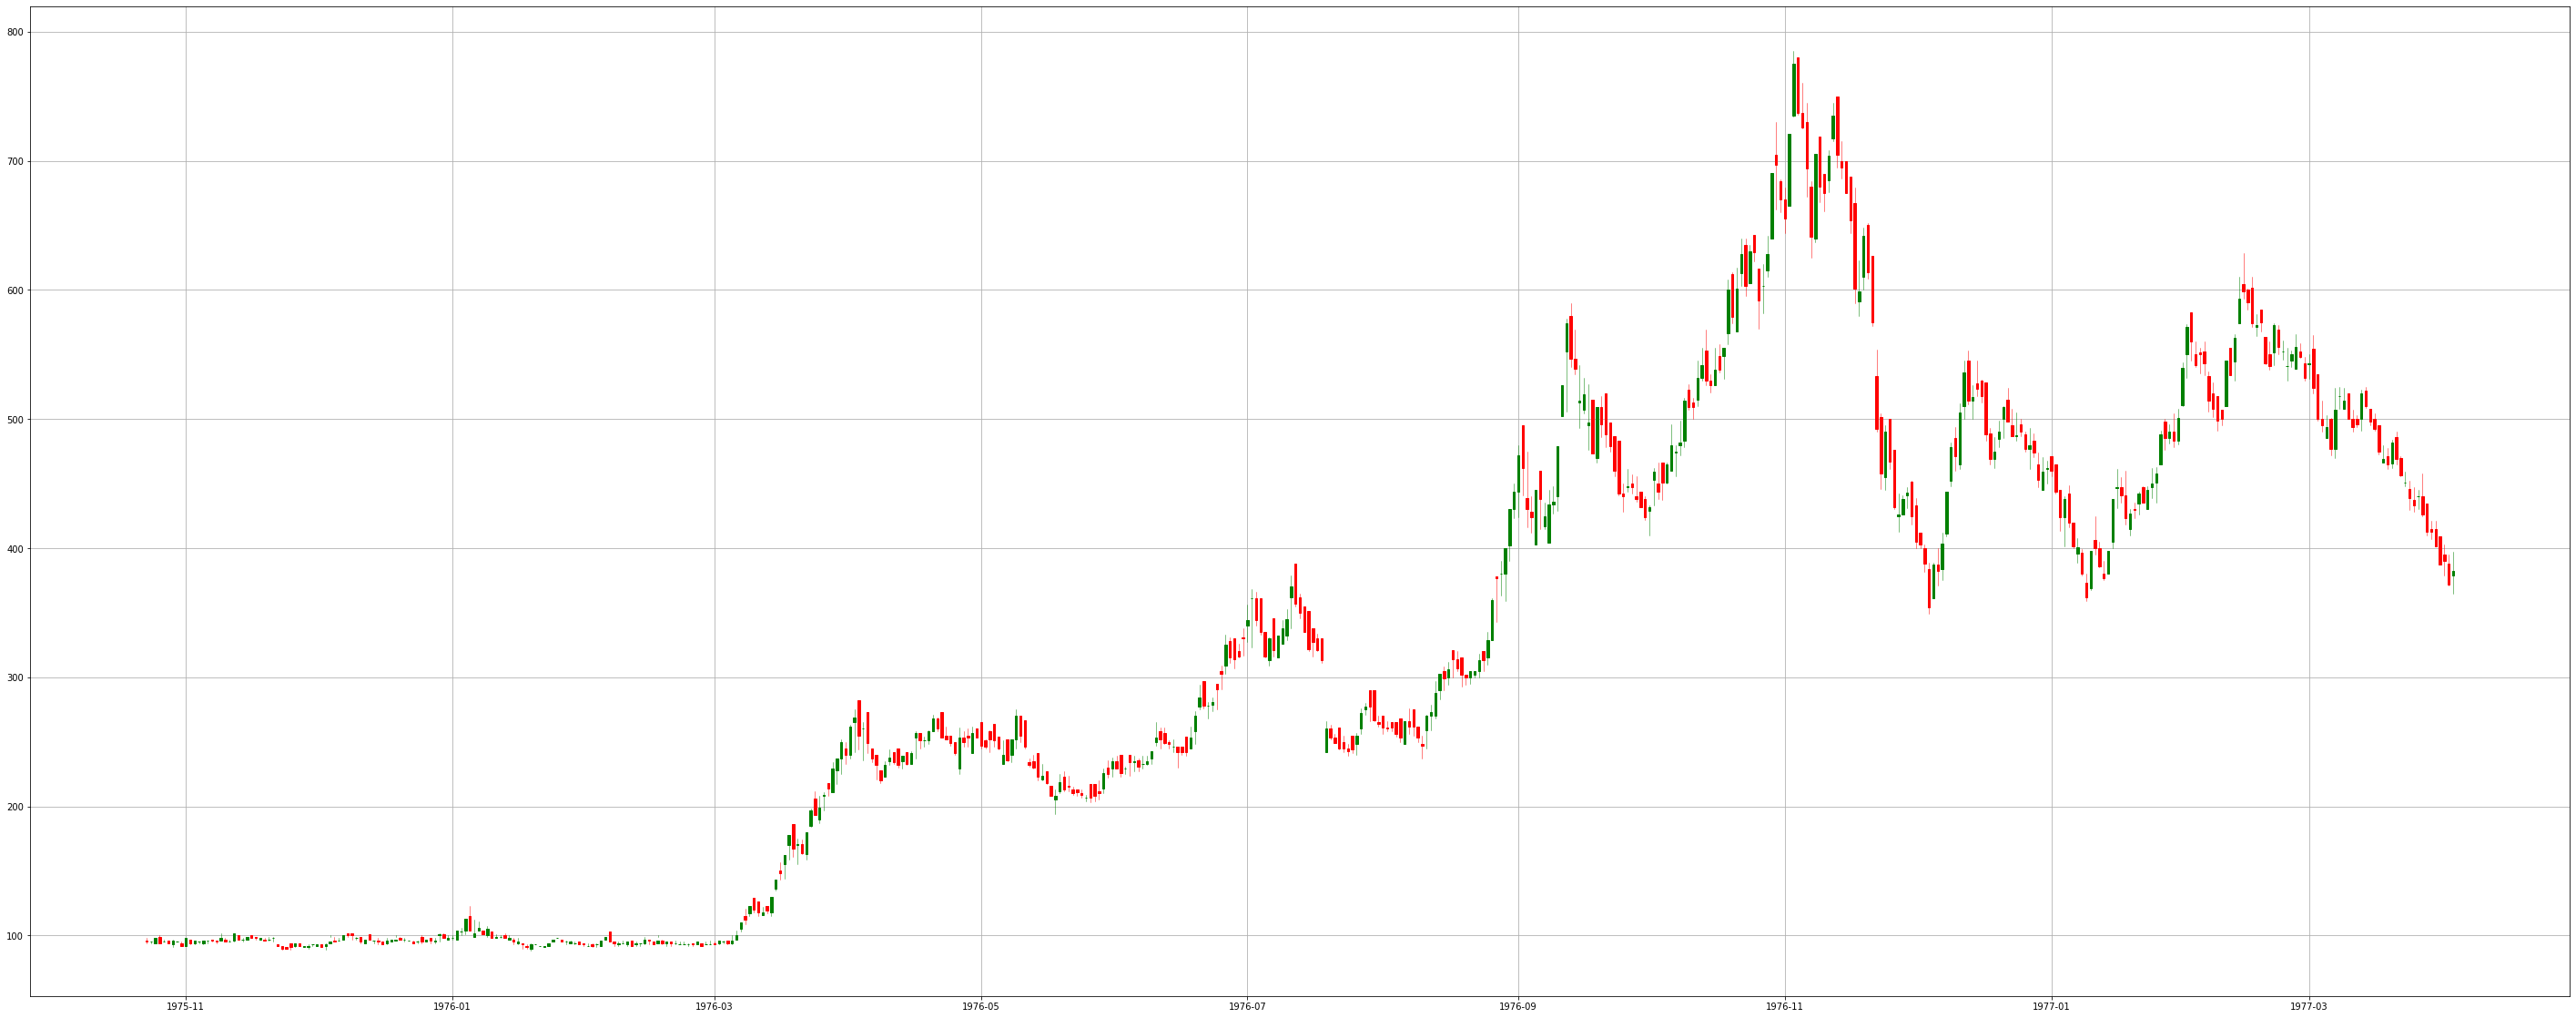

In [122]:
plt.figure(figsize=(50, 20))
ax=plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.xaxis_date()
candlestick_ohlc(ax, data.values,width=0.5, colorup='g')
plt.show()

In [ ]:
plot=ahpc[["Open","High","Low","Date"]]
plot=plot[training+1:(training+test)]
print(data)
plot["Ltp"]=result_true_data
# data.reset_index(inplace=True)
print(plot)
# data['Date']=data['Date'].map(mdates.date2num)

In [ ]:
plt.figure(figsize=(50, 20))
ax=plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.xaxis_date()
candlestick_ohlc(ax, data.values,width=0.5, colorup='g')
plt.show()

In [ ]:
print(ahpc["Ltp"][-5:])

In [ ]:
print(test_true_data)